# Multi linear regression (TOYOTA)



Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [79]:
#
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm 

In [80]:
#read the file 
toyota = pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [81]:
toyota.shape

(1436, 38)

In [82]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

there are no null values in the data

In [83]:
'''condidering only this data  
("Price","Age_08_04","KM","HP","cc","Doors","Gears",
"Quarterly_Tax","Weight")]'''

'condidering only this data  \n("Price","Age_08_04","KM","HP","cc","Doors","Gears",\n"Quarterly_Tax","Weight")]'

In [84]:
#considering only the preffered column
toyota1=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1 )

In [85]:
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [86]:
toyota1.shape

(1436, 9)

In [87]:
#renaming the column
toyota2 = toyota1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'Qtax'},axis=1)
toyota2
                          

,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [88]:
toyota2.shape

(1436, 9)

In [89]:
#finding the duplicate values 
toyota2[toyota2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


there is one duplicate value and we are dropping it

In [90]:
#droping the duplicate value
toyota3=toyota2.drop_duplicates().reset_index(drop = True)
toyota3

,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [91]:
toyota3.shape

(1435, 9)

In [92]:
toyota3.describe()

,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [93]:
#checking the correlation
toyota3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Qtax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


# Creating the scatter plot 

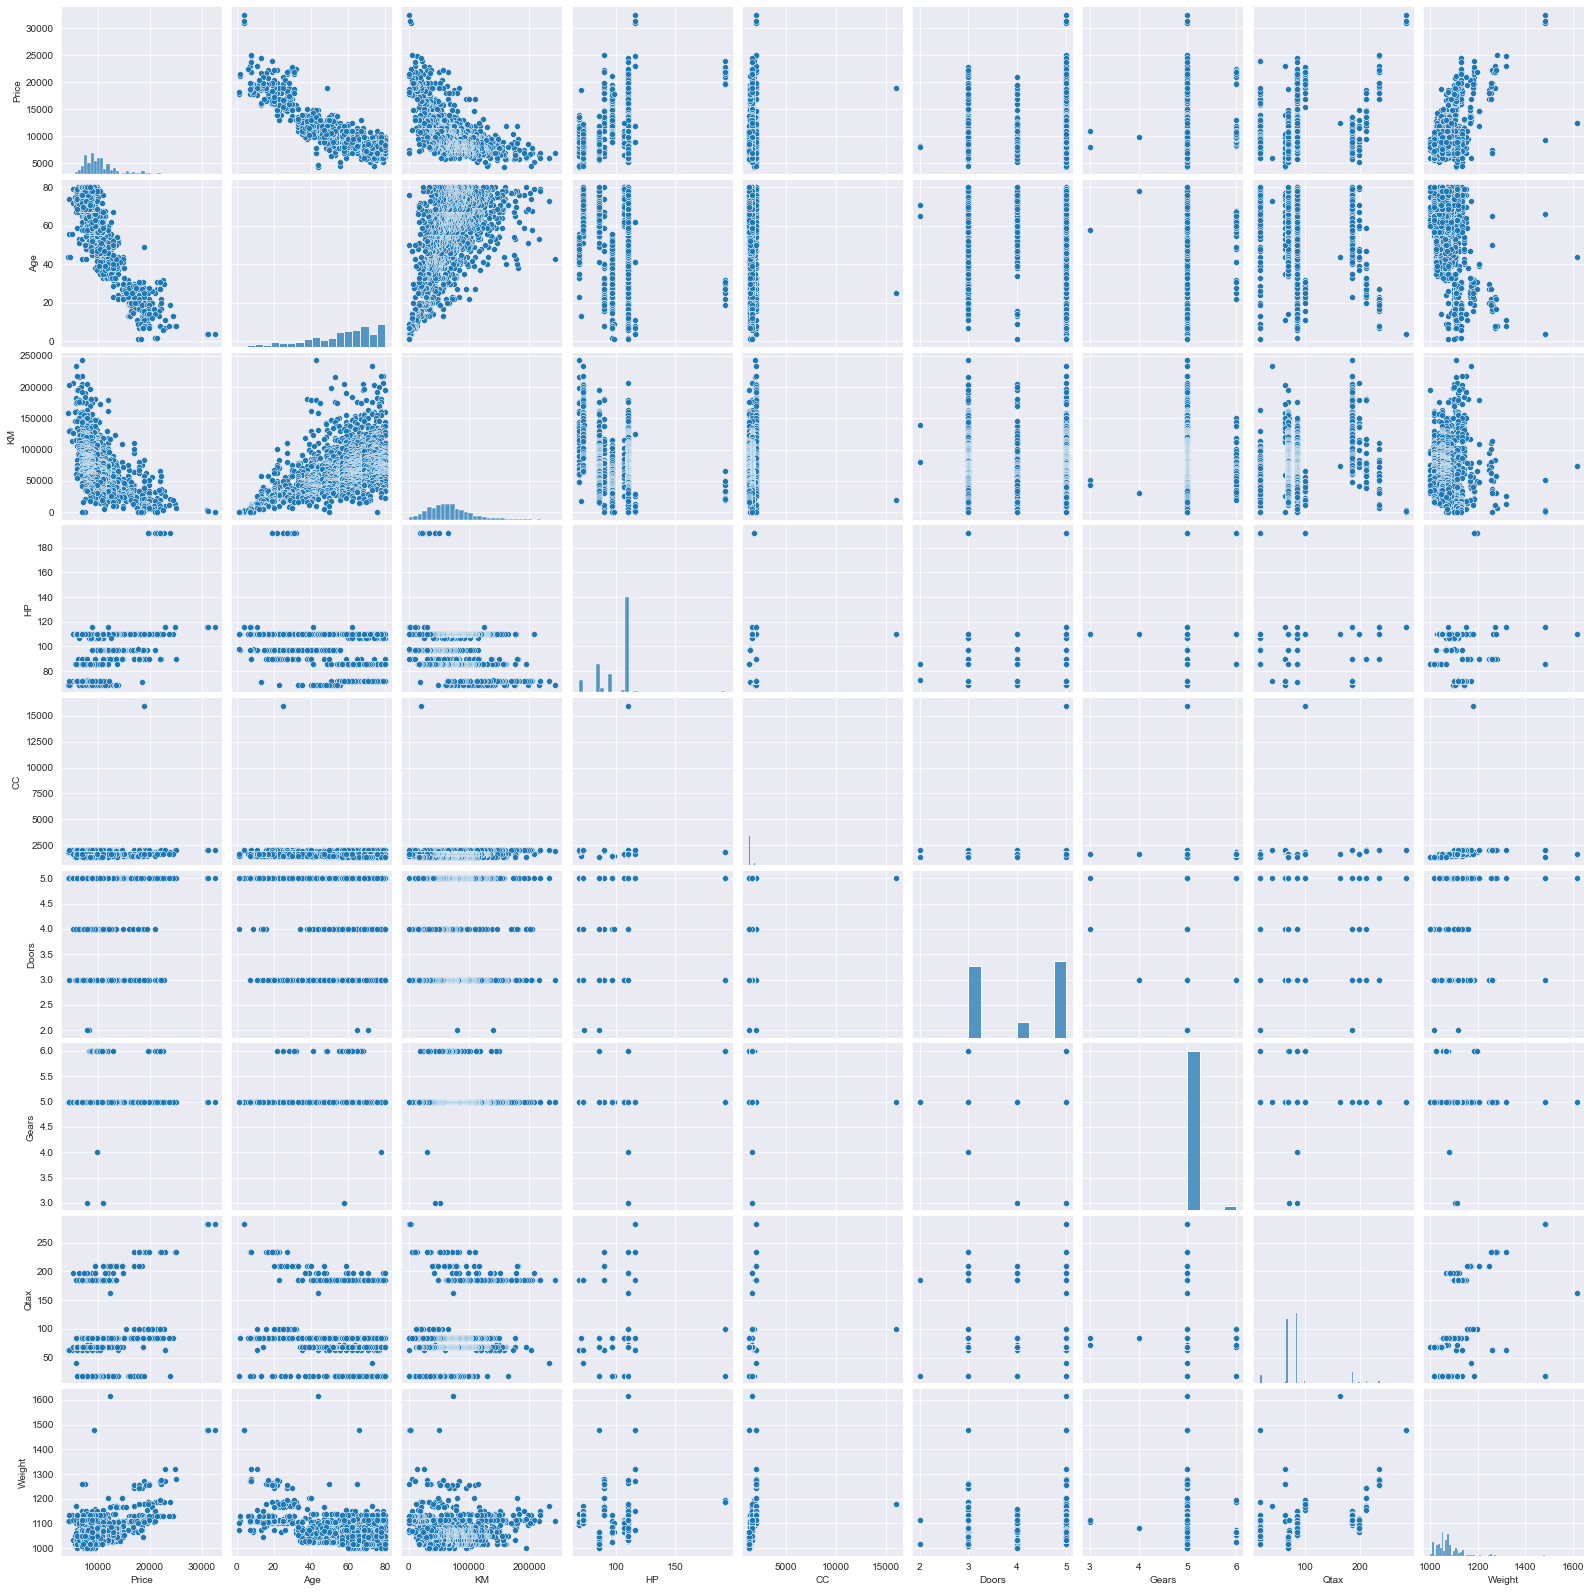

In [94]:
#creating the pairplot
sns.set_style(style='darkgrid')
sns.pairplot(toyota3)

# Preparing the model 

In [95]:
#building the model
#first assumption-->all the variables are independent of each other
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Qtax+Weight',data=toyota3).fit()

In [96]:
#coefficents
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
Qtax            3.858805
Weight         16.855470
dtype: float64

In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:39:58   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Qtax           3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

from the summary we see r**2 values and p-value ,t-value
the r**2 is used to find the value of VIF 
i.e VIF = 1/(1-r**2)


In [98]:


#checking  the dependency within the x variables by using the simple linear mkdel


In [99]:
#creating the slr model with price and cc 
slr_cc = smf.ols('Price~CC',data=toyota3).fit()

In [100]:
slr_cc.tvalues , slr_cc.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [101]:
#slr model with hp
slr_hp = smf.ols('Price~HP',data=toyota3).fit()
slr_hp.tvalues , slr_hp.pvalues

(Intercept     4.906904
 HP           12.525607
 dtype: float64,
 Intercept    1.031004e-06
 HP           3.123394e-34
 dtype: float64)

In [102]:
#slr model with Gears
slr_gears = smf.ols('Price~Gears',data=toyota3).fit()
slr_gears.tvalues , slr_gears.pvalues

(Intercept    1.805193
 Gears        2.421261
 dtype: float64,
 Intercept    0.071254
 Gears        0.015590
 dtype: float64)

In [103]:
#checking for the VIF values


In [104]:
rsq_age = smf.ols('Age~KM+HP+CC+Doors+Gears+Qtax+Weight',data=toyota3).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age+HP+CC+Doors+Gears+Qtax+Weight',data=toyota3).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age+KM+CC+Doors+Gears+Qtax+Weight',data=toyota3).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('CC~Age+KM+HP+Doors+Gears+Qtax+Weight',data=toyota3).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_dr = smf.ols('Doors~Age+KM+HP+CC+Gears+Qtax+Weight',data=toyota3).fit().rsquared
vif_dr = 1/(1-rsq_dr)

rsq_gr=smf.ols('Gears~Age+KM+HP+CC+Doors+Qtax+Weight',data=toyota3).fit().rsquared
vif_gr=1/(1-rsq_gr)

rsq_qt=smf.ols('Qtax~Age+KM+HP+CC+Doors+Gears+Weight',data=toyota3).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_wt=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+Qtax',data=toyota3).fit().rsquared
vif_wt=1/(1-rsq_wt)

#putting the vif values in a dataframe formet

d1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','Qtax','Weight'],
     'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_dr,vif_gr,vif_qt,vif_wt]}
vif_df = pd.DataFrame(d1)
vif_df


,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Qtax,2.295375
7,Weight,2.487180


the obtained vif values are under 20 soo the variables are independentof each
other

# Residual analysis
# test for normality of residuals (Q-Q plot)

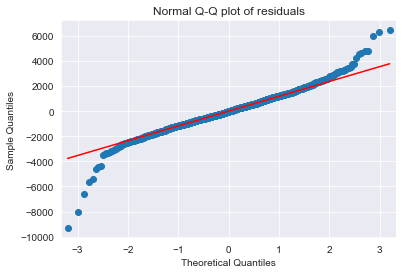

In [105]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()


# Residual plot for Homoscedarsticity

In [106]:
def get_standardized_values(vals ):
    return (vals - vals.mean())/vals.std()

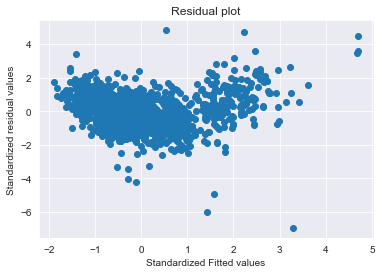

In [107]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

plt.title('Residual plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual vs regressors 

eval_env: 1


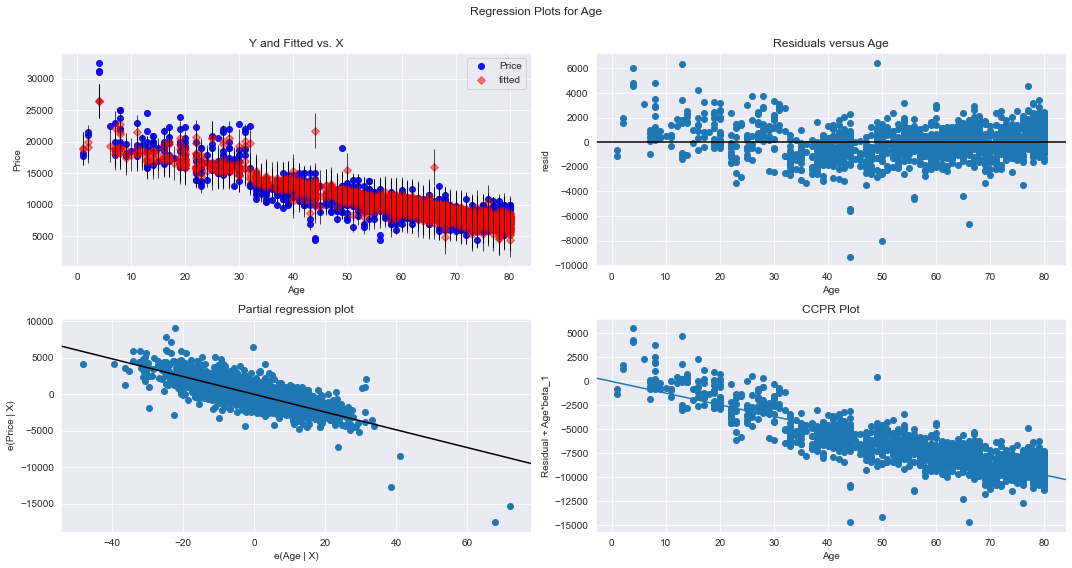

In [108]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

eval_env: 1


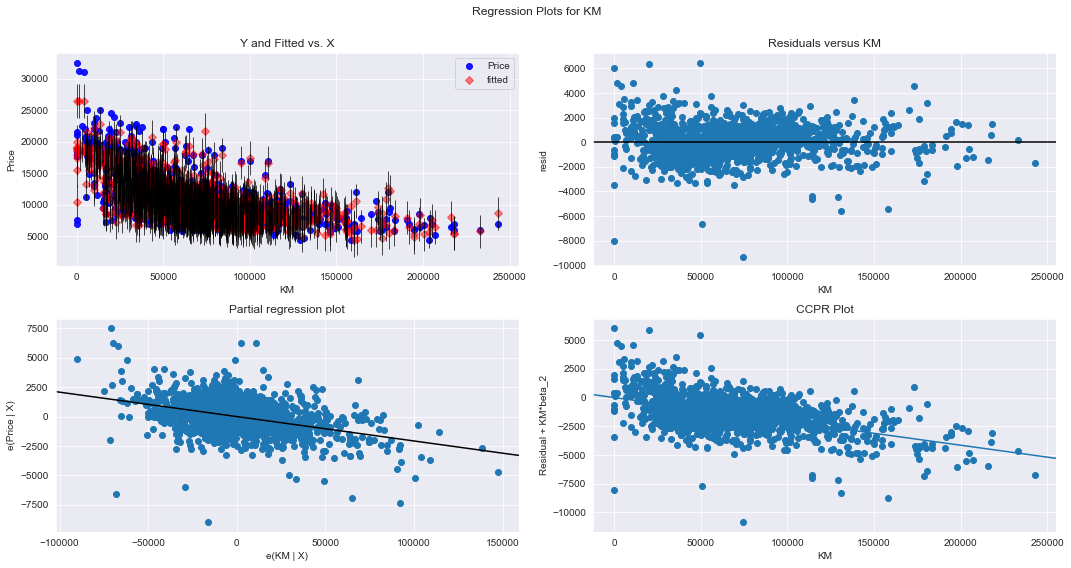

In [109]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


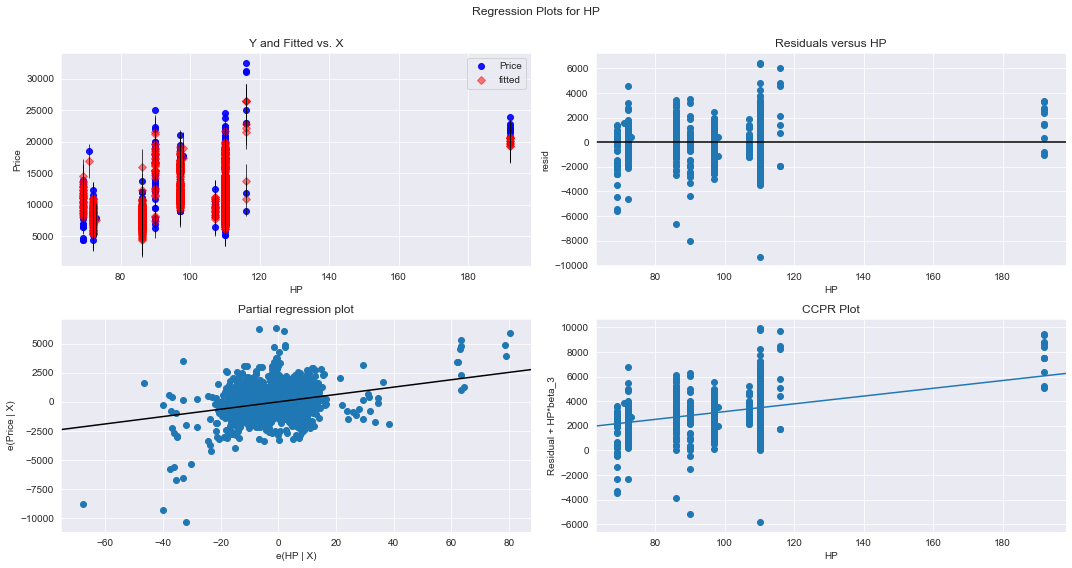

In [110]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


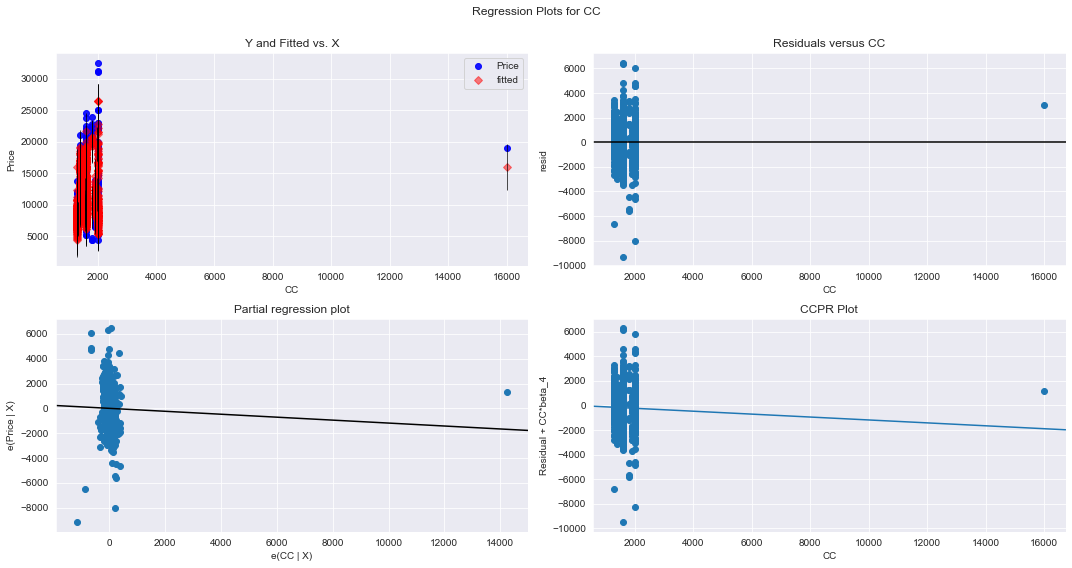

In [111]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


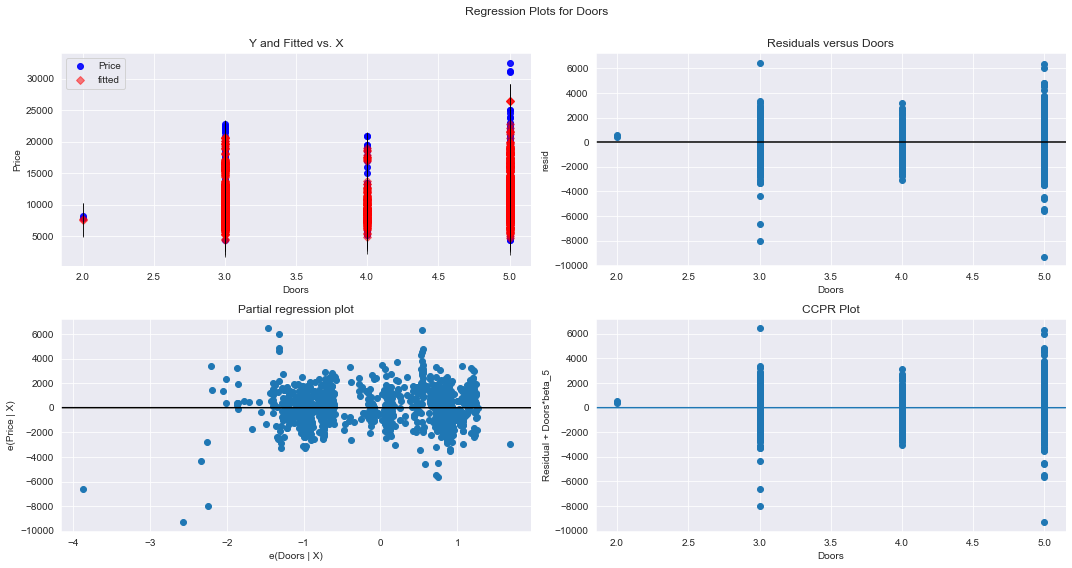

In [112]:

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


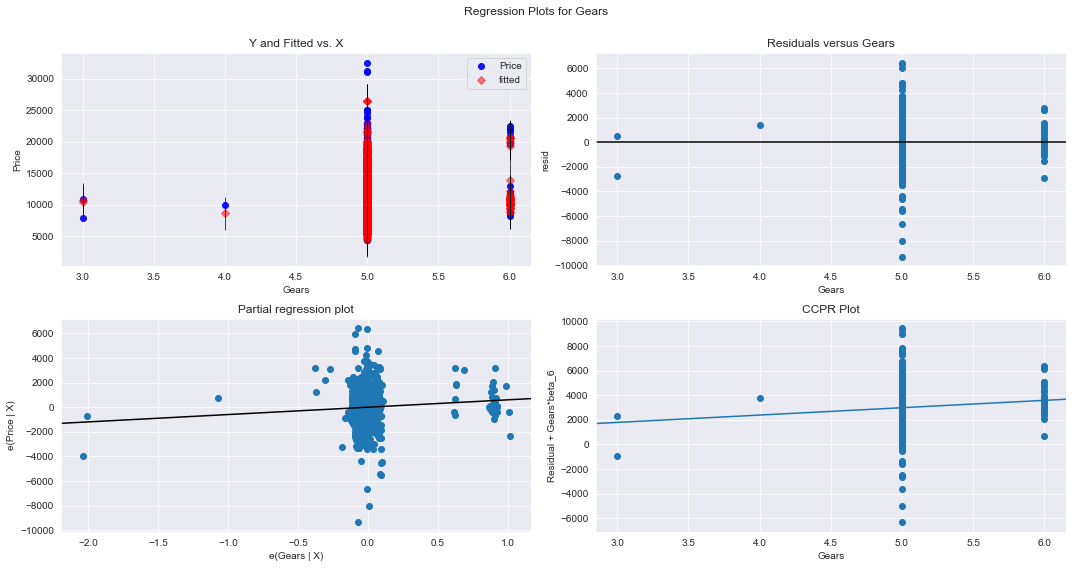

In [113]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


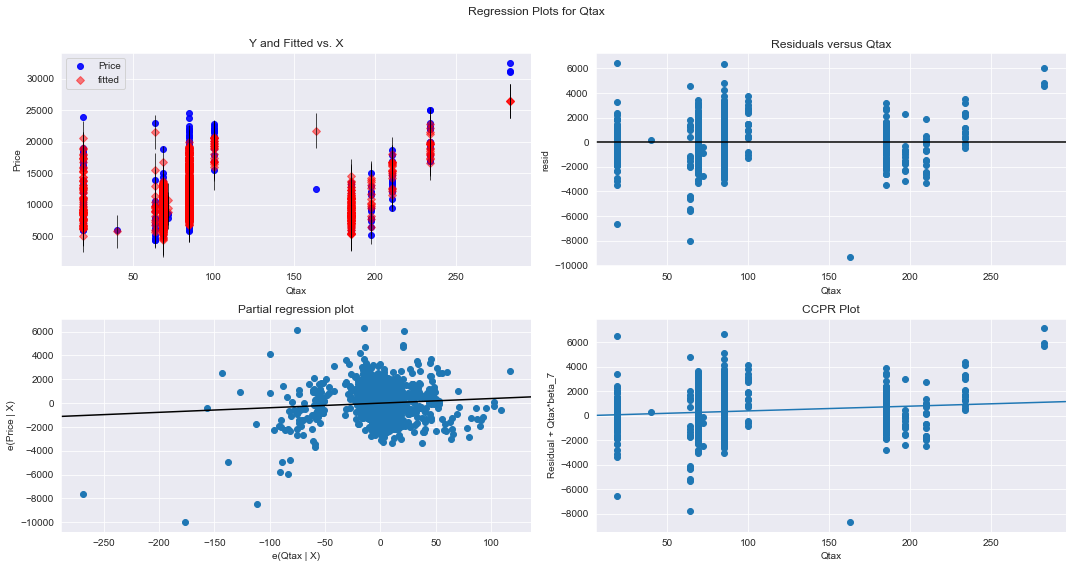

In [114]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Qtax',fig=fig)
plt.show()

# fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# model deletion diagnostics


# Detecting influencers/Outliers by using Cook's Distance

In [115]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [116]:
K=8
N=1485
3*(K+1)/N 

0.01818181818181818

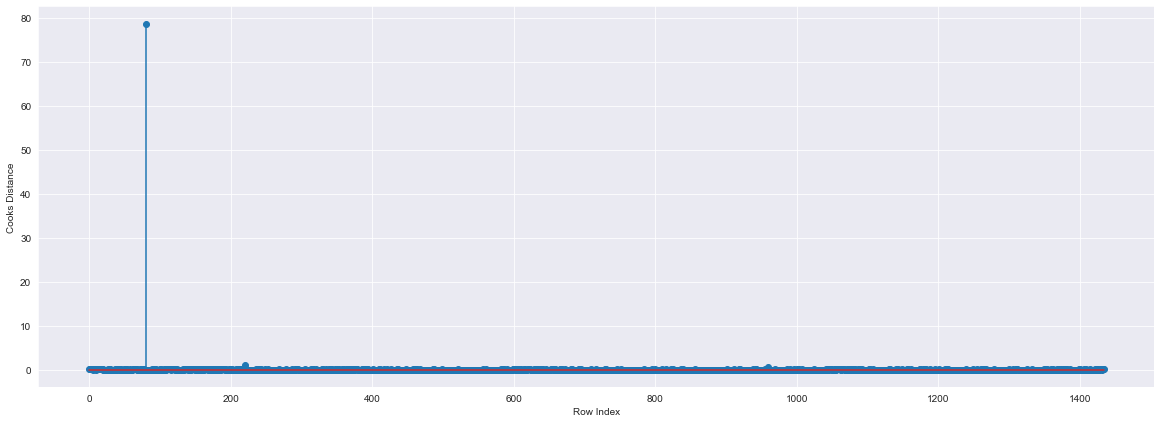

In [117]:
#ploting the influencers values using steam plot
fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota3)),np.round(c, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [118]:
#getting the high influencer value
np.argmax(c),np.max(c)

(80, 78.7295058224851)

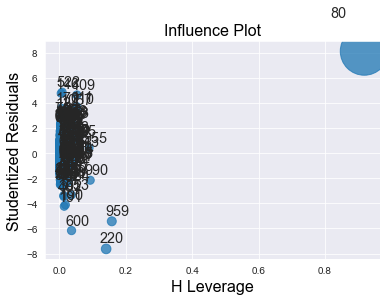

In [119]:
#getting high influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [125]:
k = toyota3.shape[1]
n = toyota3.shape[0]
leverage_cutoff = 3*((k+1)/n)

In [126]:
toyota3[toyota3.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [127]:
toyota3.head()

,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [131]:
#improving the model by droping the 80th row
toyota4 = toyota3.drop(toyota3.index[[80]],axis=0).reset_index(drop=True)
toyota4

,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [132]:
toyota4.shape

(1434, 9)

In [136]:
#creating the while loop 
while model.rsquared <0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Gears+Qtax+Weight',data=toyota4).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        toyota4=toyota4.drop(toyota4.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        toyota4
    else:
            final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Qtax+Weight',data=toyota4).fit()
            final_model.rsquared,final_model.aic
            print("This model is improved to",final_model.rsquared)

This model is improved to 0.8839684606741538
This model is improved to 0.8882395145171204
This model is improved to 0.8902571486612915
This model is improved to 0.8909888960319987
This model is improved to 0.8922595280462808
This model is improved to 0.8936660300703556
This model is improved to 0.8911152049650787
This model is improved to 0.892189901268278
This model is improved to 0.8930210061069088
This model is improved to 0.8939546425147169
This model is improved to 0.8935045481539359
This model is improved to 0.8943891945271354
This model is improved to 0.8938942787367042
This model is improved to 0.8933271401919867
This model is improved to 0.8948194656210959
This model is improved to 0.8953750500147551
This model is improved to 0.8949455651565241
This model is improved to 0.8924072228338977
This model is improved to 0.8897942788961625
This model is improved to 0.8892326077661357
This model is improved to 0.8896004704607385
This model is improved to 0.8887284032333489
This model 

This model is improved to 0.887815671343806
This model is improved to 0.8886046842170493
This model is improved to 0.8893269504633161
This model is improved to 0.8893600332825952
This model is improved to 0.8894397349337465
This model is improved to 0.8896371283766252
This model is improved to 0.889733476884571
This model is improved to 0.89029268344428
This model is improved to 0.8902885785574804
This model is improved to 0.8895358462814837
This model is improved to 0.8897326743182183
This model is improved to 0.8899285292107876
This model is improved to 0.8899787937676576
This model is improved to 0.8900202433458508
This model is improved to 0.8901762259053605
This model is improved to 0.8903337429552459
This model is improved to 0.8903518609173332
This model is improved to 0.8906303689176716
This model is improved to 0.891354789267747
This model is improved to 0.8919541195753102
This model is improved to 0.8923807639174866
This model is improved to 0.8928452450988937
This model is i

This model is improved to 0.8976188134049283
This model is improved to 0.8980923356633823
This model is improved to 0.8978199439673119
This model is improved to 0.8981286952562453
This model is improved to 0.8986025433998074
This model is improved to 0.8989611951036107
This model is improved to 0.8995244076438227
This model is improved to 0.8997894983275457
This model is improved to 0.9001454327668049
This model is improved to 0.9003267684724641
This model is improved to 0.9010051861733037


In [137]:
final_model.rsquared

0.9010051861733037

In [138]:
#final model data here were all the unwanted rows were deleted and got a good data 
toyota4

,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,13950,24,41711,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,12950,23,71138,69,1900,3,5,185,1105
...,...,...,...,...,...,...,...,...,...
1045,8950,71,29000,86,1300,3,5,69,1045
1046,8450,72,26000,86,1300,3,5,69,1015
1047,8950,78,24000,86,1300,5,5,85,1065
1048,8450,80,23000,86,1300,3,5,69,1015


In [139]:
#applying the new data to pridict the price 
#example creating the new data by providing our values
new_data=pd.DataFrame({'Age':12,'KM':40000,'HP':80,'CC':1300,'Doors':4,'Gears':5,'Qtax':69,'Weight':1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
0,12,40000,80,1300,4,5,69,1012


In [143]:
#predicting all the values price of the new data by provideng the values
final_model.predict(new_data)

0    14276.063854
dtype: float64

In [144]:
#predicting the price of the dataset toyata4
pred_y = final_model.predict(toyota4)
pred_y

0       14044.599835
1       14335.046467
2       13920.670063
3       13430.662132
4       12744.173607
            ...     
1045     9450.201291
1046     8399.226502
1047     9056.564782
1048     7611.548709
1049     8615.665370
Length: 1050, dtype: float64

all the prices are predicted 